In [1]:
import altair.vega.v3 as vg
from altair.datasets import load_dataset

In [2]:
spec = {
  "$schema": "https://vega.github.io/schema/vega/v3.0.json",
  "width": 400,
  "height": 200,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": [
        {"category": "A", "amount": 28},
        {"category": "B", "amount": 55},
        {"category": "C", "amount": 43},
        {"category": "D", "amount": 91},
        {"category": "E", "amount": 81},
        {"category": "F", "amount": 53},
        {"category": "G", "amount": 19},
        {"category": "H", "amount": 87}
      ]
    }
  ],

  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "category"},
      "range": "width",
      "padding": 0.05,
      "round": True
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "amount"},
      "nice": True,
      "range": "height"
    }
  ],

  "axes": [
    { "orient": "bottom", "scale": "xscale" },
    { "orient": "left", "scale": "yscale" }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "category"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "amount"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.category", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.amount", "offset": -2},
          "text": {"signal": "tooltip.amount"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
}

To render in the classic notebook run this line:

In [3]:
vg.renderers.enable('notebook')

PluginRegistry.enable('notebook')

To render in JupyterLab and nteract, run this

In [4]:
vg.renderers.enable('default')

PluginRegistry.enable('default')

In [5]:
vg.renderers.get()(spec)

({'application/vnd.vega.v3+json': {'$schema': 'https://vega.github.io/schema/vega/v3.0.json',
   'width': 400,
   'height': 200,
   'padding': 5,
   'data': [{'name': 'table',
     'values': [{'category': 'A', 'amount': 28},
      {'category': 'B', 'amount': 55},
      {'category': 'C', 'amount': 43},
      {'category': 'D', 'amount': 91},
      {'category': 'E', 'amount': 81},
      {'category': 'F', 'amount': 53},
      {'category': 'G', 'amount': 19},
      {'category': 'H', 'amount': 87}]}],
   'signals': [{'name': 'tooltip',
     'value': {},
     'on': [{'events': 'rect:mouseover', 'update': 'datum'},
      {'events': 'rect:mouseout', 'update': '{}'}]}],
   'scales': [{'name': 'xscale',
     'type': 'band',
     'domain': {'data': 'table', 'field': 'category'},
     'range': 'width',
     'padding': 0.05,
     'round': True},
    {'name': 'yscale',
     'domain': {'data': 'table', 'field': 'amount'},
     'nice': True,
     'range': 'height'}],
   'axes': [{'orient': 'bottom', 's

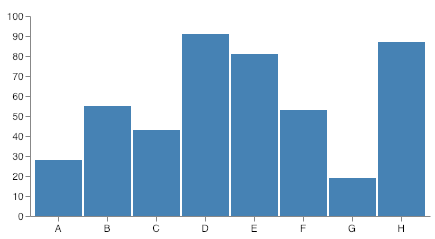

In [6]:
vg.Vega(spec, validate=True)

In [7]:
vg.renderers.enable('json')

PluginRegistry.enable('json')

In [8]:
vg.Vega(spec, validate=True)

<Vega 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html
